# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

C:\Users\manor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_data = pd.read_csv("dota2Dataset/dota2Train.csv")
train_data.head()

,Win,clusterID,GameMode,GameType,AM,AXE,BANE,BS,CM,DROW,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


# Segregating heroes 

In [3]:
variables = train_data.iloc[:,4:]
variables

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,-1,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,-1,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,-1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,-1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,-1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [5]:
test = x['PUDGE'].value_counts().tolist()
pick_rate = (test[1] + test[2])/(test[0]+test[1]+test[2])*100
pick_rate

30.528872099298436

# Feature extraction algo
Hero win rate 
win == hero:  herowin ++ also toalcount ++
    win!= hero and hero != 0  totalcount ++
    
    
    after all iter 
    herowin/toatl win++
hero radint win rate 
win == hero && win == 1 radintWin++ also radinatTotal ++
win!= hero && hero!= 0 win!= -1 : radintToal ++
win == hero && win == -1 direwin ++ aldo direTotal ++
win != hero && hero ! = 0 && win != 1: direTotal ++
    radintWinRate= 

# Finding Winrate based on side

In [6]:
 def target(row):
    if row['Win'] == -1 :
        val = 0
    else:
        val = 1
    return val
train_data['Y'] = train_data.apply(target,axis = 1)
train_data['Y'].value_counts()

1    48782
0    43868
Name: Y, dtype: int64

In [7]:
#winrate radiant 
winrate_radiant = (48782/(48782+43868)) *100
winrate_radiant

52.651915812196435

In [8]:
x.describe()

,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
count,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,...,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000,92650.000000
mean,-0.001630,-0.000971,0.000691,-0.000799,-0.002008,0.003173,-0.000345,-0.003832,0.005979,0.001543,...,-0.000766,-0.001371,-0.000950,0.000885,0.000594,0.001025,0.000648,-0.000227,-0.000043,0.000896
std,0.402004,0.467672,0.165052,0.355393,0.329348,0.483950,0.348865,0.501760,0.588109,0.325344,...,0.253609,0.535024,0.206112,0.283985,0.155940,0.220703,0.204166,0.168707,0.189868,0.139033
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# All Feature extraction in a single function

In [9]:
# function to find hero winrates
def hero_winrates(col):
    hero_win = 0           # for winrate
    total_games = 0        # for winrate 
    hero_pick = 0          # for picks
    total_pick_games = 0   # for picks
    hero_radiant_win = 0   #for radiant winrate
    hero_dire_win = 0      #for dire winrate
    hero_radiant_total_games = 0 #for radiant winrate
    hero_dire_total_games = 0 # for dire winrate
    for index, row in train_data.iterrows():     # 
        
        if row[col] == row['Win']:             
            hero_win = hero_win + 1
            total_games = total_games + 1
            
            if row['Win'] == 1:
                hero_radiant_win = hero_radiant_win + 1
                hero_radiant_total_games =  hero_radiant_total_games +1
            
            elif row['Win'] == -1:
                hero_dire_win = hero_dire_win + 1
                hero_dire_total_games = hero_dire_total_games + 1
        
        elif row[col]!= row['Win'] and row[col] != 0:
            total_games = total_games + 1
            if row[col] == 1:
                hero_radiant_total_games =  hero_radiant_total_games +1
            else :
                hero_dire_total_games = hero_dire_total_games + 1
        
        if row[col]!= 0:
            hero_pick = hero_pick + 1
            total_pick_games = total_pick_games + 1
        
        else :
            total_pick_games = total_pick_games + 1
    
            
    hero_win_rate = hero_win/total_games
    hero_radiant_win_rate = hero_radiant_win/hero_radiant_total_games
    hero_dire_win_rate = hero_dire_win/hero_dire_total_games
    hero_pick_rate = hero_pick/total_pick_games
    return hero_win_rate,hero_radiant_win_rate,hero_dire_win_rate,hero_pick_rate
    
total_winrates_array = []
radiant_winrates_array = []
dire_winrates_array = []
hero_pickrates_array = []
for col_names in list(variables):
    hero_win_rate,hero_radiant_win_rate,hero_dire_win_rate,hero_pick_rate = hero_winrates(col_names)
    total_winrates_array.append(hero_win_rate)
    radiant_winrates_array.append(hero_radiant_win_rate)
    dire_winrates_array.append(hero_dire_win_rate)
    hero_pickrates_array.append(hero_pick_rate)

In [10]:
#total_winrates_array

# Putting winrates in dataframes

In [11]:
hero_list = list(variables)
hero_winrate_df  = pd.DataFrame(total_winrates_array)
hero_winrate_df = hero_winrate_df.T
hero_winrate_df = hero_winrate_df*100
hero_winrate_df.columns = hero_list
hero_raidant_winrate_df  = pd.DataFrame(radiant_winrates_array)
hero_raidant_winrate_df = hero_raidant_winrate_df.T
hero_raidant_winrate_df = hero_raidant_winrate_df*100
hero_raidant_winrate_df.columns = hero_list
hero_dire_winrate_df  = pd.DataFrame(dire_winrates_array)
hero_dire_winrate_df = hero_dire_winrate_df.T
hero_dire_winrate_df = hero_dire_winrate_df*100
hero_dire_winrate_df.columns = hero_list
hero_pickrates_df  = pd.DataFrame(hero_pickrates_array)
hero_pickrates_df = hero_pickrates_df.T
hero_pickrates_df = hero_pickrates_df*100
hero_pickrates_df.columns = hero_list

In [12]:
hero_winrate_df


,AM,AXE,BANE,BS,CM,DROW,EARTHSHAKER,JUGG,POTM,SF,...,ET,LC,EMBER,EARTHSPIRIT,UNDERLORD,PHEONIX,TECHIES,ORACLE,WW,ARCWARDEN
0,46.697389,52.704303,45.007924,50.752008,54.766169,53.474654,50.159631,50.439405,55.320145,50.147854,...,58.566874,48.712341,47.484756,42.170771,42.609854,48.814536,51.268773,43.420554,44.640719,43.32775


# Box plot for hero winrates

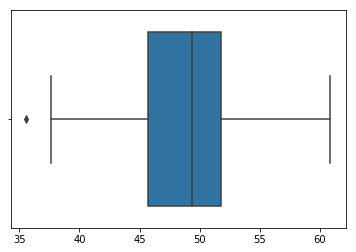

In [13]:
sns.boxplot(hero_winrate_df)

In [14]:
#sns.pairplot(hero_winrate_df)

# Hero winrates visualised

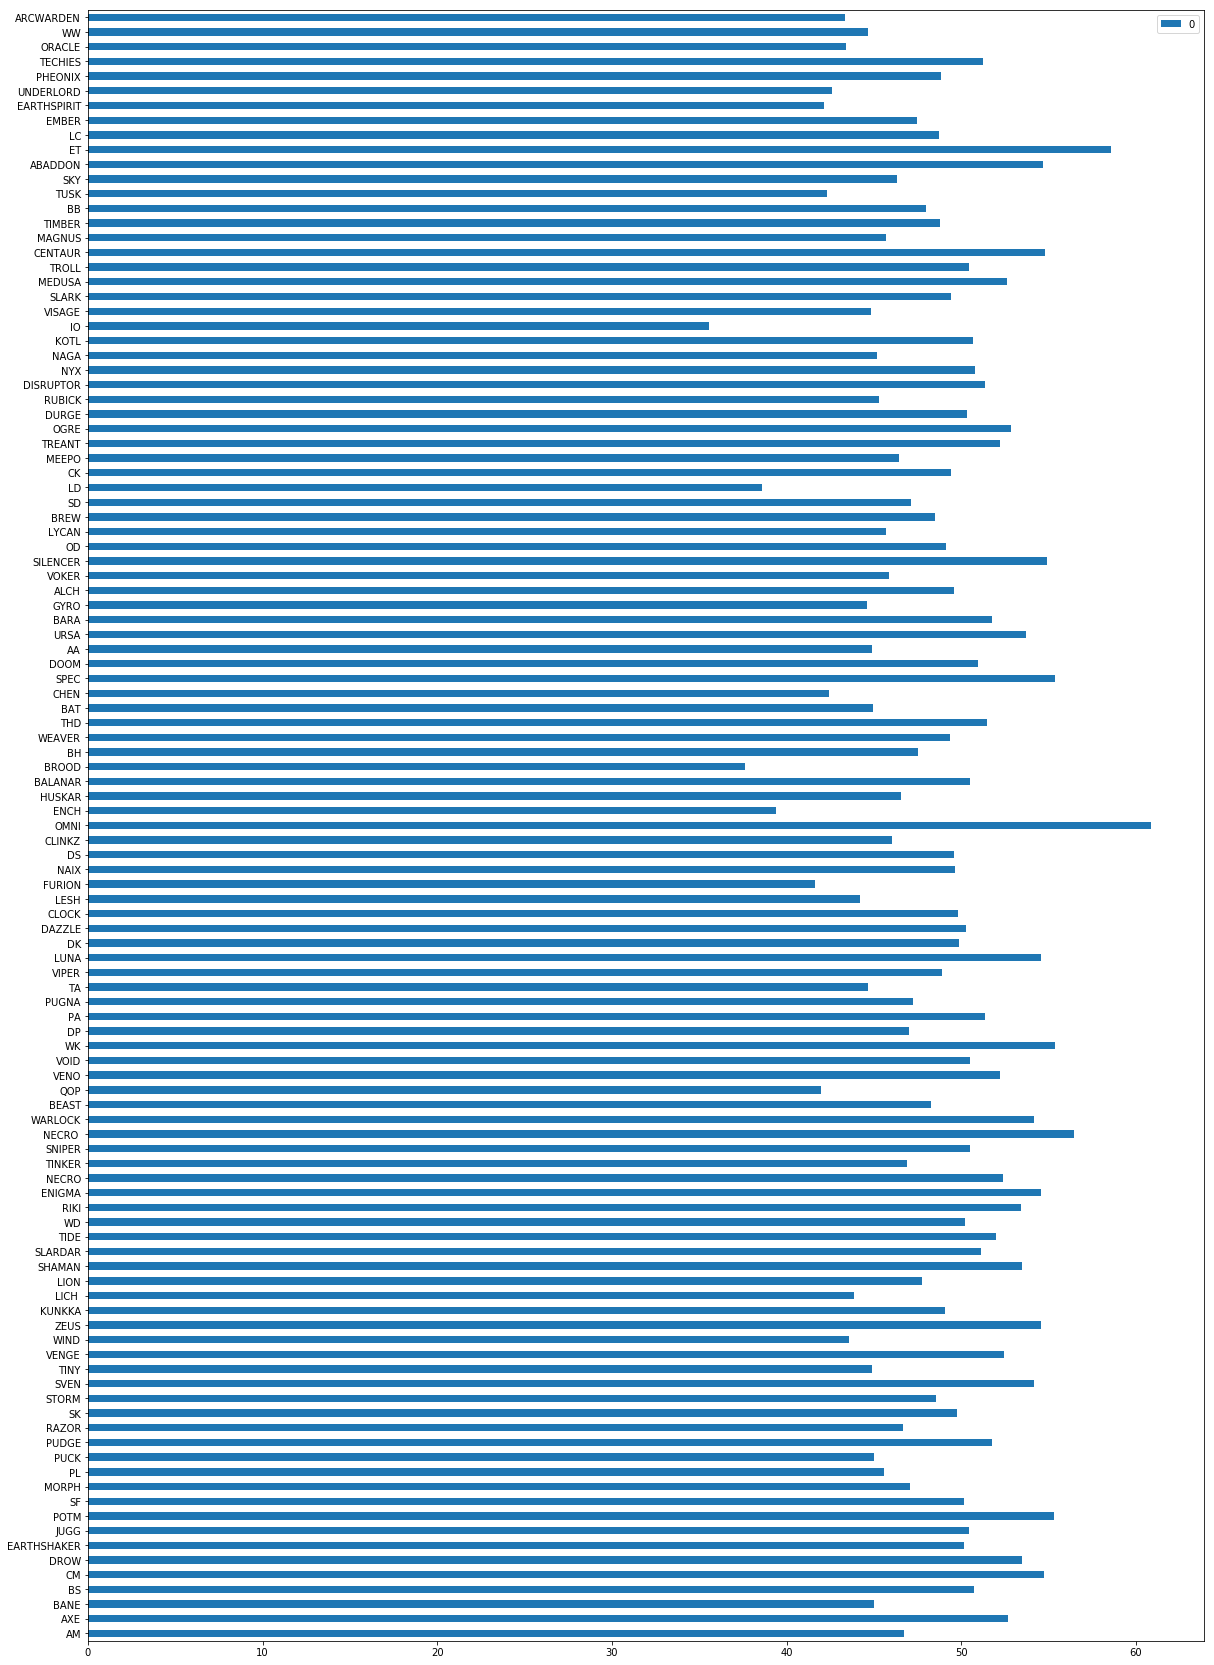

In [15]:
hero_winrate_df.T.plot.barh(figsize= (20,30))


# Radiant Winrates of heroes

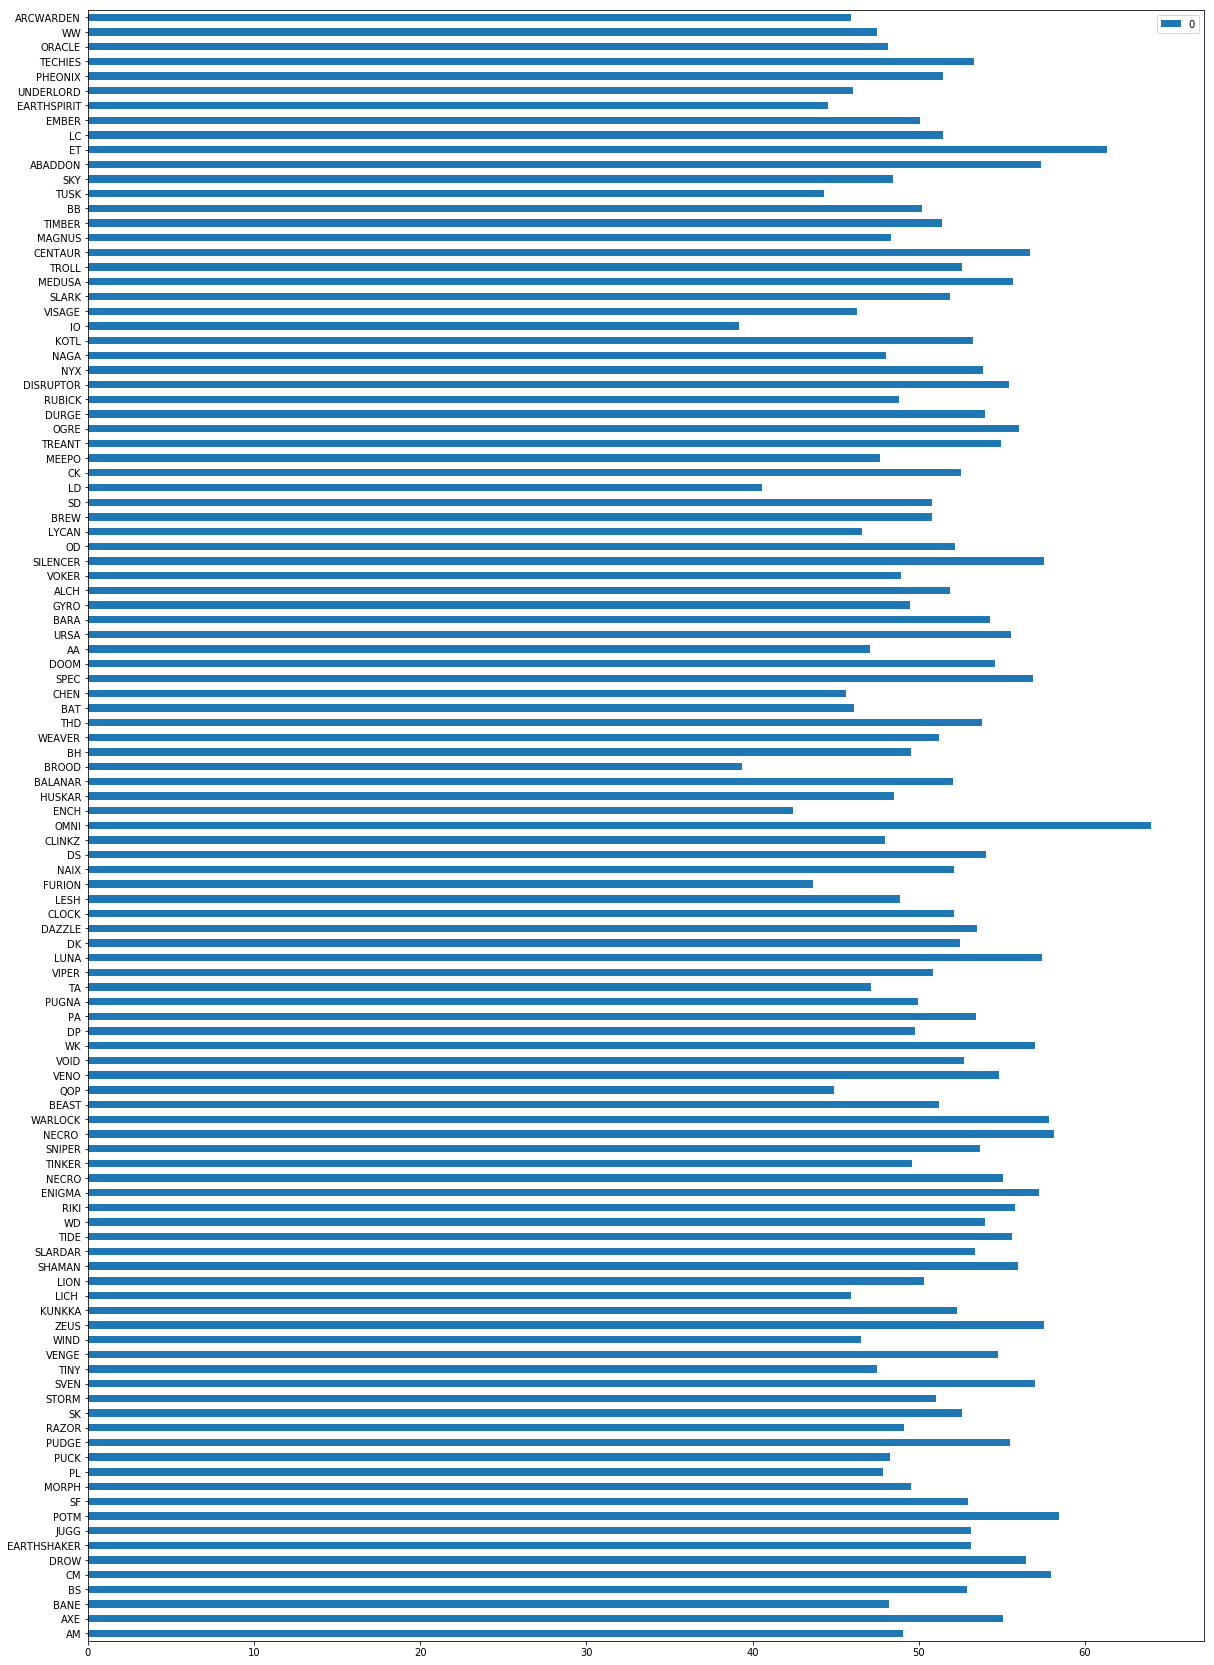

In [16]:
hero_raidant_winrate_df.T.plot.barh(figsize= (20,30))

# Dire Winrate of Heroes

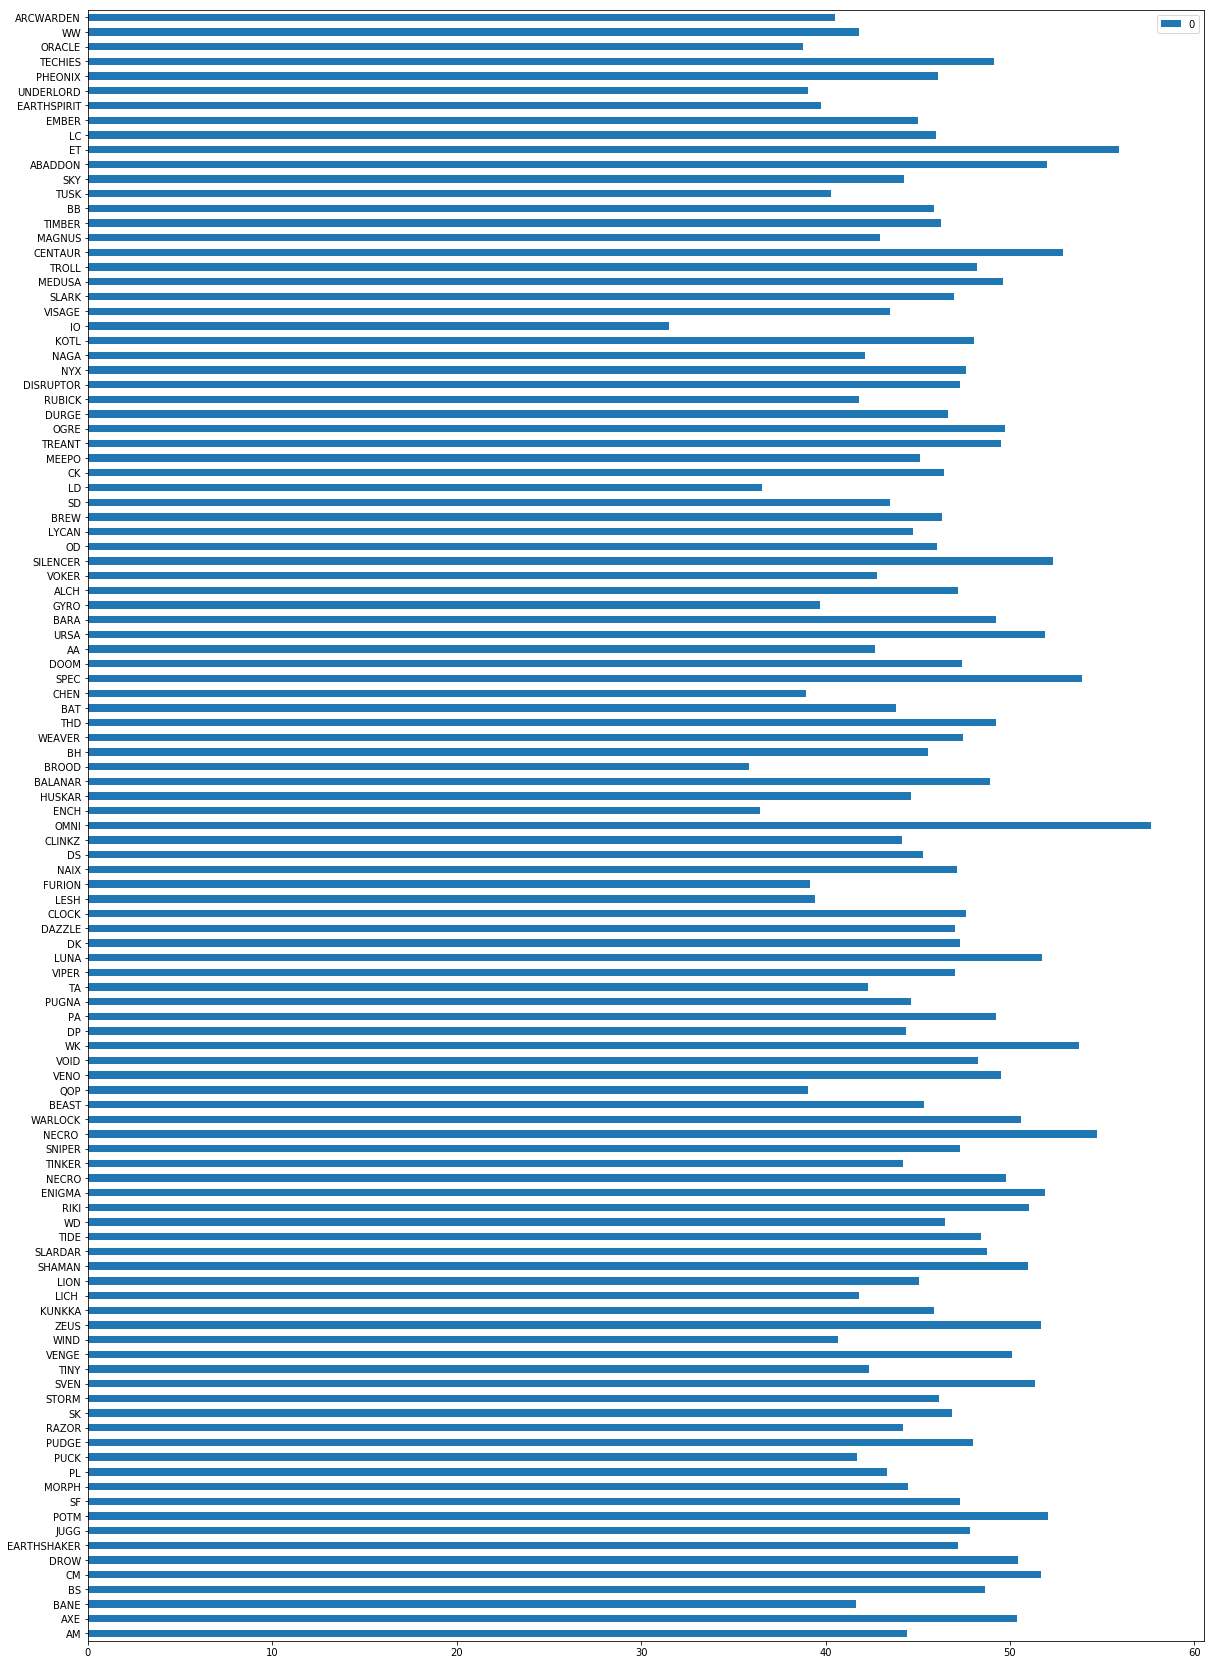

In [17]:
hero_dire_winrate_df.T.plot.barh(figsize= (20,30))

# Hero Pick rates

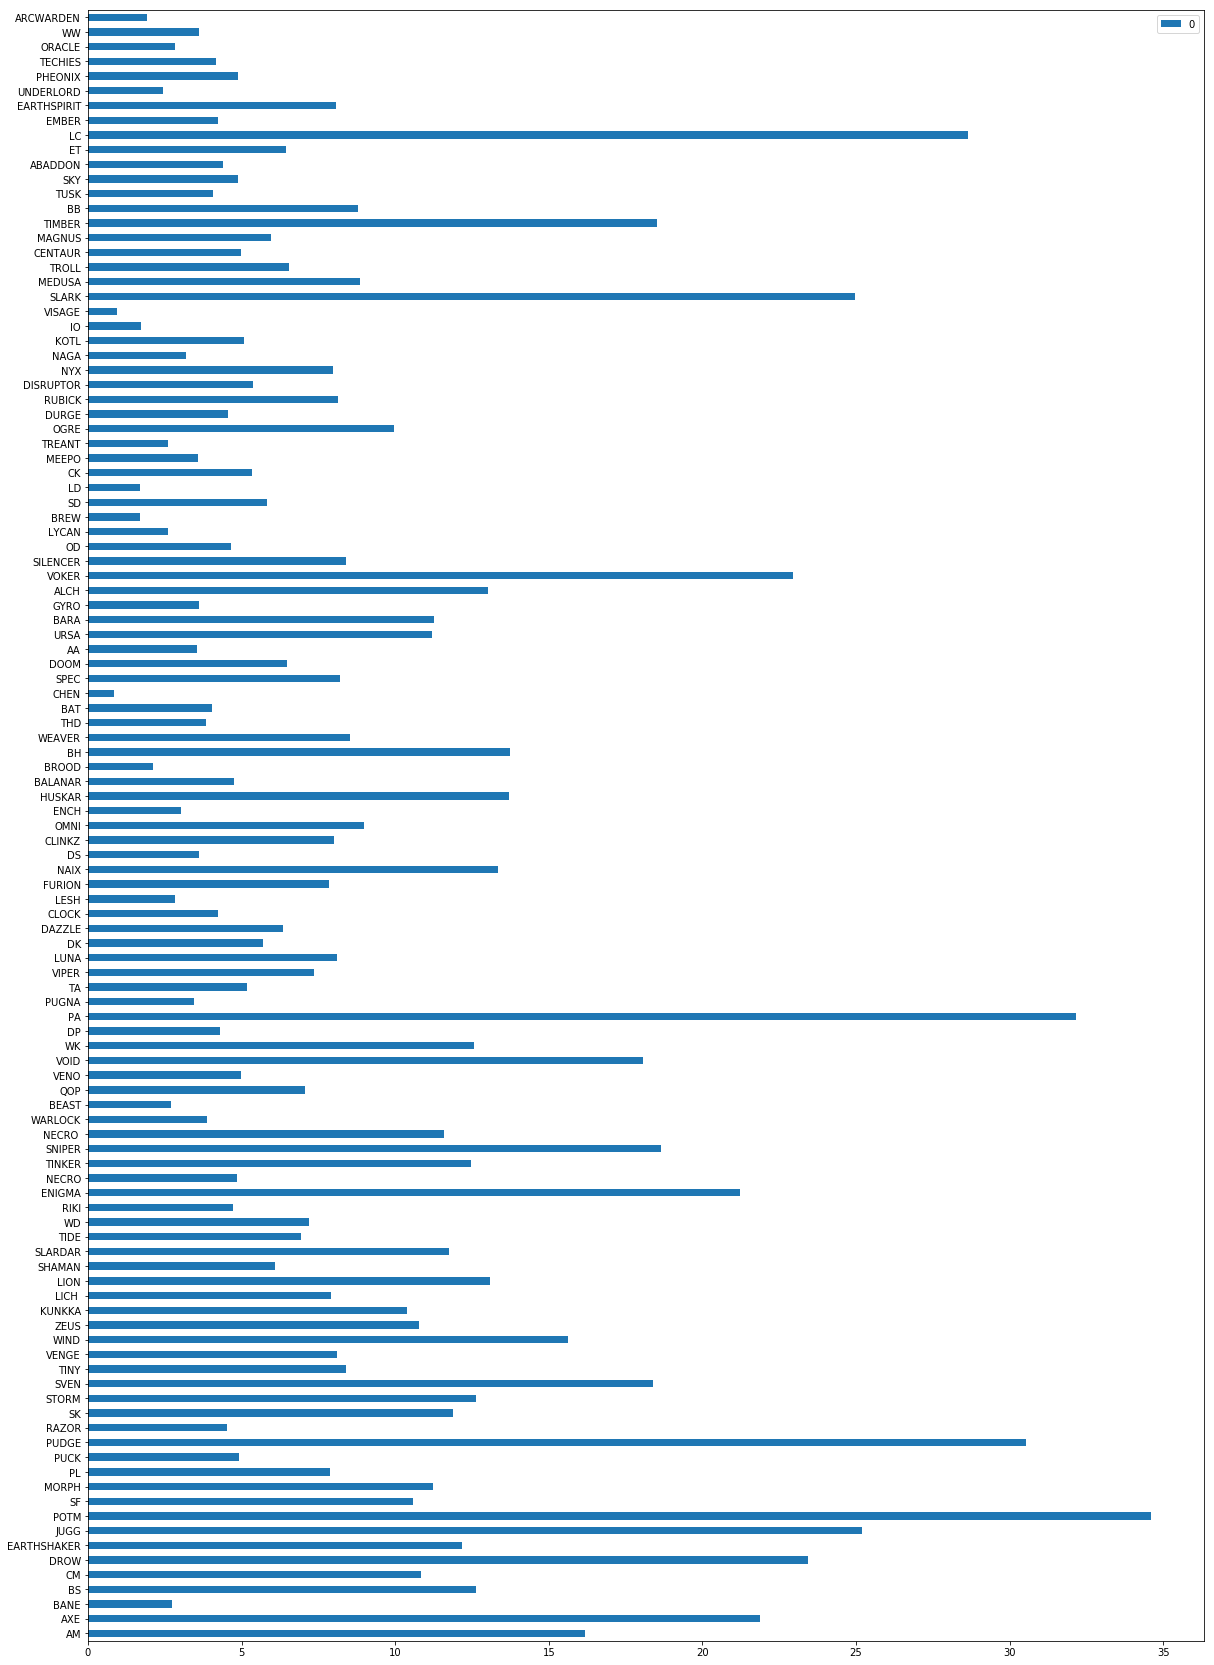

In [18]:
hero_pickrates_df.T.plot.barh(figsize= (20,30))

# Radiant and Dire winrates Compared


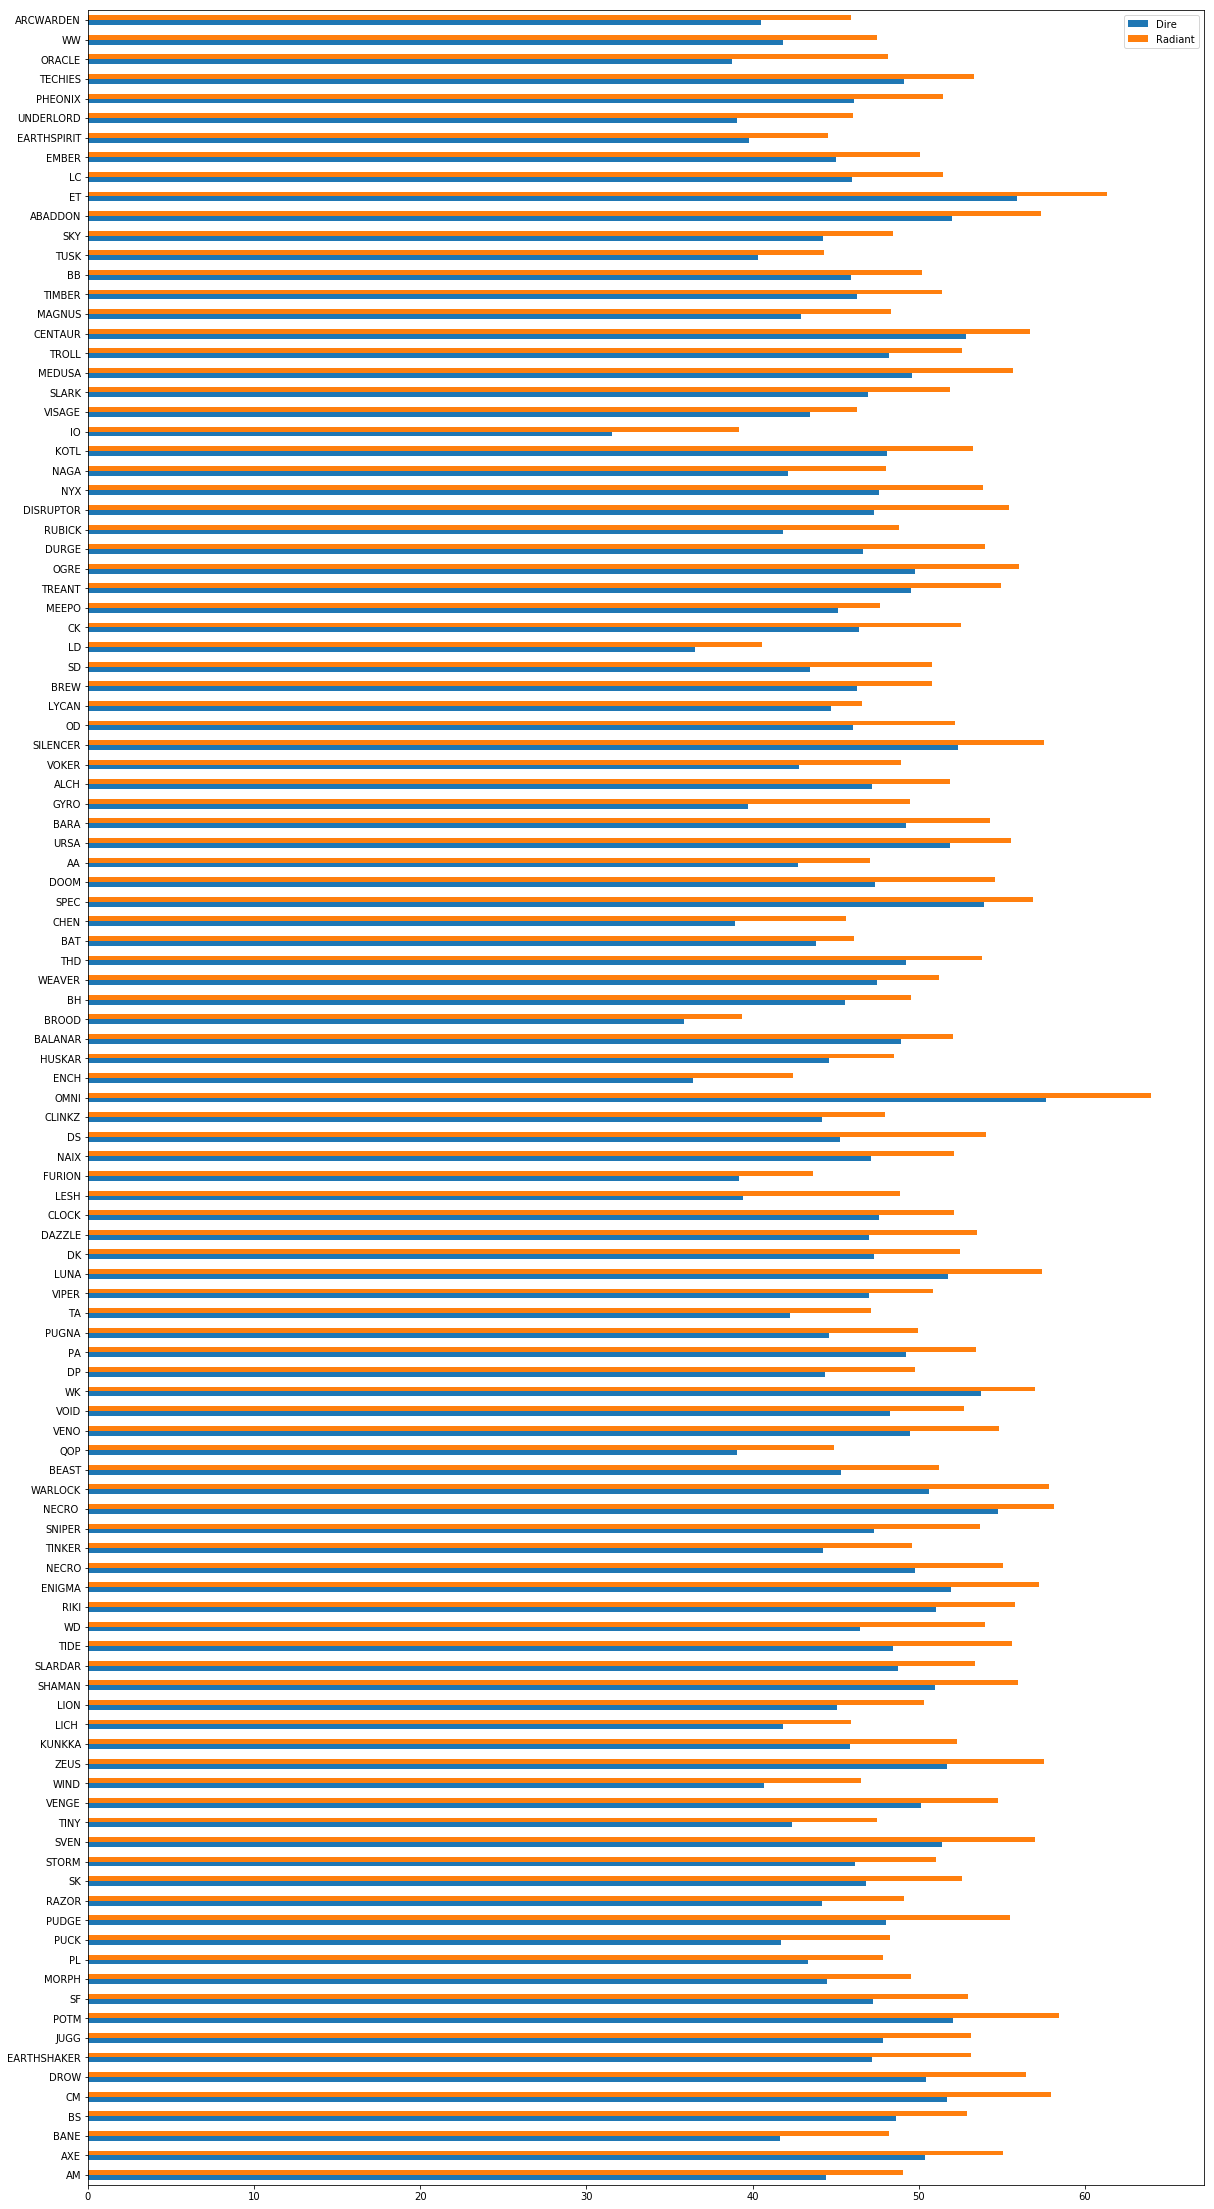

In [43]:
radiant_dire_df = pd.concat([hero_dire_winrate_df,hero_raidant_winrate_df])
radiant_dire_df = radiant_dire_df.T
radiant_dire_df.columns = ['Dire','Radiant']
radiant_dire_df.plot.barh(figsize = (20,40))
